$\color{brown}{\text{HCIN 620 Lab 5 Unsupervised Clustering Algorithms}}$

The following resources have been used to generate this notebook

https://realpython.com/k-means-clustering-python/

Data is located at UCI repository. Check the link for further information.

https://archive.ics.uci.edu/ml/datasets/HCV+data

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

If you’re interested in learning how and when to implement k-means clustering in Python, then this is the right place. You’ll walk through an end-to-end example of k-means clustering using Python, from preprocessing the data to evaluating results.

In this tutorial, you’ll learn:

* What k-means clustering is

* When to use k-means clustering to analyze your data

* How to implement k-means clustering in Python with scikit-learn

* How to select a meaningful number of clusters </div>

Notebook by Reza Afra, Ph.D. and Barbara Berkovich, Ph.D., M.A.

Revised by Thidarat Tinnakornsrisuphap, Ph.D.


# **Step 1 Environment Setup**

##Import Code Libraries.

The first set of libraries is the same as Modules 2-4 with the addition of [plotly.express ](https://plotly.com/python/plotly-express/)

**Run Import 1.**


In [99]:
##  Import 1. Data manipulation and visualization libraries

import pandas as pd             # data manipulation library
import io                       # Helps with Input/output of csv files
import numpy as np              # Fast array operations
import matplotlib.pyplot as plt # a library to plot nice graphs
plt.style.use('ggplot')
import seaborn as sns           # plot style and color on next line
sns.set(style="white", palette="muted", color_codes=True)

import plotly.express as px     # for EDA data scattermatrix visualization

print('Import 1 complete')

Import 1 complete


Scikit Learn (Rhymes with psychic) is the main machine learning library in Python. The [scikit-learn.org](https://scikit-learn.org/stable/) maintains the open source code. </br>

**Question 1**  Give a very brief description of the following sklearn classes*:

1. KMeans: An unspupervised clustering algorithm that devides data into k clusters by minimizing the variance within the cluster and assigning each data point to the nearest cluster center.
2. PCA: The process of reducing the number of dimensions of a dataset by transforming it into a set of linearly uncorrelated components is referred to as PCA. The components are ordered according to the variance they account for.
3. Pipeline: An advanced form of utility class that bundles several preprocessing, and estimation steps into a single entity allowing consistent application with a common interface for streamlined use.

'* *Note that classes in this context refers to subprograms within the code libaries. Do not confuse this with the term classes as it is used in machine learning classification models.*


**Run the code to complete the import 2.**

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


print('Import 2 complete')

Import 2 complete


# **Step 2 Data Cleaning**

**Use the Folder and upload icons (left) to upload data-lab-5-hcv.csv**

**Run the code** to read the hepatitis C virus (HCV) data in the Colab Runtime Environment.


In [101]:
hcv = pd.read_csv("data-lab-5-hcv.csv")
print('Data connection complete')

Data connection complete


**Question 2** Another way to view the data in Python is simply to use the name of the data frame.  In this case we've read the input file into a data frame call **hcv**. Enter that name on the next command line. </br>
**Run it.**

In [102]:
# Answer 2: Add the name of the data frame below
hcv


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


##Handle missing values



Run the code below to check for null values.

In [103]:
hcv.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


**Question 3** </br>

Edit this text cell to answer the questions below:
1. List the variables with NaN (not a number) values. ALB, ALP, ALT, CHOL, PROT.
2. How many rows of ALP contain NaN? 18



**Question 4**
Use the fillna command using the 'ffill' method to replace NaN with the value of the previous row. </br>Print the data frame as  you did in Question 2 to confirm that NaN has been replaced.

**Run the fillna step**

In [104]:
# Answer 4: Add code below to fill the missing values.
hcv = hcv.fillna(method='ffill')
print(hcv)

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0   87.3   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0   87.3  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.1

<ipython-input-104-bab34bcb3e44>:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



**Question 5** In the original dataset (Question 2), lines 613 and 614 had missing values (NaN) for the variable ALP. Answer the following questions about the results of the 'ffill' method.


1. What is the new values of ALP on rows 613 and 614?
   
   87.3
2. Where did that number come from?
   
   From the row 612
3. How does this differ from the backfill method used in Lab 2 (Question 11)?

   This method uses the value from the cell above to raplace the NaN, unlike backfill that uses the cell below

4.  What is the term we use when we fill the missing values with "guesses"?

   Imputation

5.  What is another way we could handle the missing data?

  Deletion (dropping rows or columns with missing values)





##Drop Unnecessary Variables

**Question 6** The first column,'Unnamed:  0' is a dummy variable in place of the patient id (removed for privacy).</br>Enter and run the code to drop the column 'Unnamed: 0'</br>Print the dataframe as you have in previous steps to verify that the NaN values have been replaced.</br>

NOTE: Python has context sensitive help. Type in **hcv.dr** and pause to see the help in a pop-up window.
</br>




In [105]:
# Answer 6:  Drop the columns 'Unnamed: 0'
hcv = hcv.drop('Unnamed: 0', axis=1)
hcv.isnull().sum()

,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0
CHOL,0


# **Step 3 Exploratory Data Analysis (EDA)**


##Scatter Matrix

**Category** contains the code indicating the diagnosis.
0=Blood donor (undiagnosed)
0s=suspect blood donor (suspected of liver disease, unconfirmed)
1=Hepatitis
2=Fibrosis
3=Cirrhosis
If we were using a supervised machine learning technique, this column might be the target and the values would be training labels. </br>
Since we are using and unsupervised technique, we will just use Category in our visual data exploration, and not in the actual clustering algorithm.

Read about the plotly.express [scatter_matrix](https://plotly.com/python/splom/)

**Run the plotly command below which plots the correlations between the labs for each value of Category.**


In [106]:
# Let's explore the relationship between features using the plotly.express (px) library

fig = px.scatter_matrix(hcv,
    dimensions=list(hcv.drop(columns="Category").columns),
    color="Category")
fig.show()

**Question 7**  </br>
Study the scatter matrix. Can you see cells where the data is well separated, and would be a good candidate for clustering? Edit this text box to record your answers below.

1. List the  columns where the category colors *are* well separated across multiple rows.

PROT, CHOL, CHE, ALB

2. List the columns where the category colors *are not* well separated across multiple rows.

CREA, BIL, AST, ALP, SEX



Since we are working with a multidimensional array, we can only visualize the location of dots on a plane. We can zoom in on a single cell of the scatter matrix to see more detail.

**Run the next code cell** to zoom in on the plot of CHE vs CHOL.

In [107]:
##Scatter matrix on CHE, CHOL only
fig = px.scatter_matrix(hcv,
    dimensions=['CHE', 'CHOL'],
    color='Category')
fig.show()

**Question 8**


With the increased resolution in these plots, how might you interpret the relationship between CHE, CHOL and the category information?

1. There is a positive relationship between CHOL and CHE levels.
2. Orange dots (cirrhosis) tend to have lower CHE and CHOL levels, suggesting impaired liver cell function.
3. Green dots (hepatitis) tend to have higher CHE levels than CHOL.
4. Blue dots (blood donor) tend ot have higher levels of both CHE and CHOL.
5. Purple dots (fibrosis) are mostly in the center of the plots.
6. Red dots (suspect blood donor) are scattered on the plots.

There are no fixed rules for visualizing the relationships within this data. One can iterate two by two matricies for other columns as we have just done.
</br></br>
*At the  beginnning of any analysis do a little homework to increase your clinical understanding of the data elements. Whenever possible seek collaboration with a trained clinician to be aware of known correlations.*
</br></br>

##Heatmap

**Run the code below** to generate a heatmap



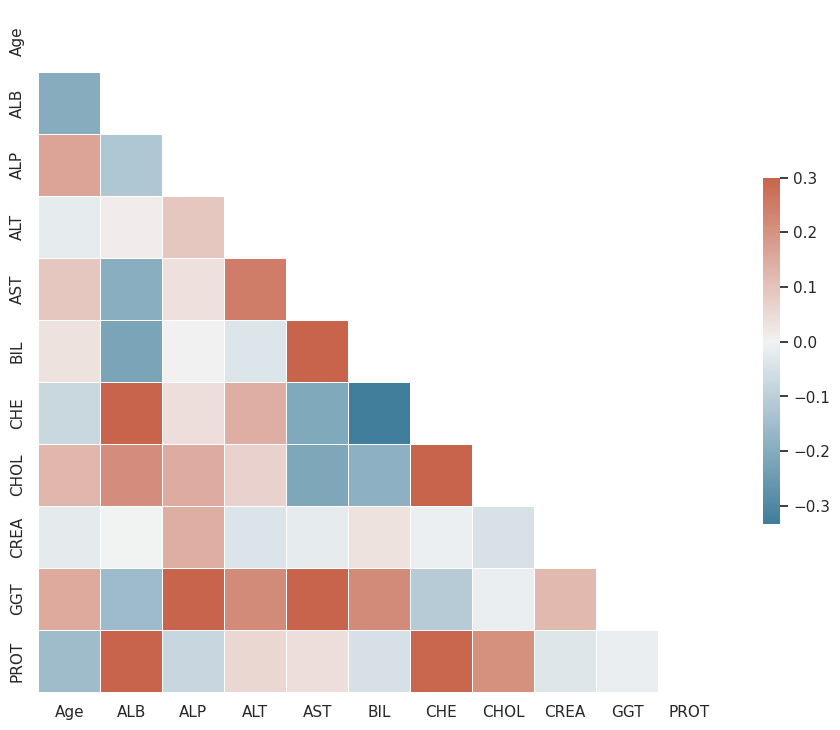

In [108]:
# Look at correlations more closely
corr = hcv.corr(numeric_only = True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##Correlation Matrix

**Question 9**

Enter the command to generate a correlation matrix.

**Run the corr command**

In [109]:
# Answer 9: Type the command to print correlation matrix in this cell, and run.
hcv.corr(numeric_only=True)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.198264,0.164897,-0.021529,0.088666,0.032492,-0.075093,0.123985,-0.022296,0.153087,-0.153561
ALB,-0.198264,1.000000,-0.123752,0.011220,-0.193793,-0.221673,0.376018,0.212580,-0.001405,-0.156441,0.551233
ALP,0.164897,-0.123752,1.000000,0.089440,0.036594,0.003089,0.039928,0.147796,0.143333,0.412092,-0.076857
ALT,-0.021529,0.011220,0.089440,1.000000,0.246455,-0.038651,0.143759,0.066142,-0.040104,0.218003,0.055865
AST,0.088666,-0.193793,0.036594,0.246455,1.000000,0.312231,-0.208536,-0.213714,-0.021387,0.491263,0.038426
BIL,0.032492,-0.221673,0.003089,-0.038651,0.312231,1.000000,-0.333172,-0.185433,0.031224,0.217024,-0.048909
CHE,-0.075093,0.376018,0.039928,0.143759,-0.208536,-0.333172,1.000000,0.424832,-0.011157,-0.110345,0.295028
CHOL,0.123985,0.212580,0.147796,0.066142,-0.213714,-0.185433,0.424832,1.000000,-0.048274,-0.013434,0.206172
CREA,-0.022296,-0.001405,0.143333,-0.040104,-0.021387,0.031224,-0.011157,-0.048274,1.000000,0.121003,-0.032095
GGT,0.153087,-0.156441,0.412092,0.218003,0.491263,0.217024,-0.110345,-0.013434,0.121003,1.000000,-0.012845


##Preprocessing



##Encode the data


Since there is no ordinal relationship among the category labels, the following code encodes these as separate columns of ones and zeros.

**Run the encoding.**


In [110]:
#Encoding
true_label_names = hcv['Category']

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)


hcv = pd.get_dummies(hcv, dtype=float)  # automatically detects and processes columns with non-numeric data types (like object, category, string)
hcv

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,46,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Question 10** The original Category column has been transformed.

How many category columns are there now?

**Answer 10**

5

##Pipeline



In practical machine learning pipelines, it’s common for the data to undergo multiple sequences of transformations before it feeds into a clustering algorithm. You learned about the importance of one of these transformation steps, feature scaling in an earlier lab. An equally important data transformation technique is dimensionality reduction, which reduces the number of features in the dataset by either removing or combining them.
Dimensionality reduction techniques help to address a problem with machine learning algorithms known as the curse of dimensionality. In short, as the number of features increases, the feature space becomes sparse. This sparsity makes it difficult for algorithms to find data objects near one another in higher-dimensional space.

###Dimensionality Reduction using Principal Component Analysis (PCA)
PCA is one of many dimensionality reduction techniques. It transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability of the input data through a linear combination of the input data’s features.

The next code block is another application of scikit-learn pipelines. In Lab 4, we used a pipeline to scale the variables, and assign to the x and y values for regression. In this lab, we will use the pipeline to scale the numeric data and perform PCA dimensionality reduction in preparation for the clustering algorithm.




###MinMaxScaler

The pipeline will implement an alternative to the StandardScaler class called MinMaxScaler for feature scaling. You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution.

**Run the pipeline.**

In [111]:
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

# Dimensionality reduction starts here
preprocessor = Pipeline(
     [
         ("scaler", MinMaxScaler()),
         ("pca", PCA(n_components=2, random_state=42)),
     ]
)

print('MinMaxScaler and PCA pipline complete')

MinMaxScaler and PCA pipline complete


# **Step 4 Build the Model**

##KMeans Clustering Algorithm

Now that you’ve built a pipeline to process the data, you’ll build a separate pipeline to perform k-means clustering. You’ll override the following default arguments of the KMeans class:</br>
**init=k-means++**" instead of "random" to ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random".

**n_init=50**: You’ll increase the number of initializations to ensure you find a stable solution.

**max_iter=500**: You’ll increase the number of iterations per initialization to ensure that k-means will converge.


**Run the initialization pipeline.**

In [112]:
clusterer = Pipeline(
    [
       (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
 )

print('initialization pipline complete')

initialization pipline complete


**Run the preprocesser and clustering pipeline.**

In [113]:
pipe = Pipeline(
  [
       ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
   )
print('preprocessing and clustering complete')

preprocessing and clustering complete


**Run the code to fit the model to the data.**

In [114]:
pipe.fit(hcv)



Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

##Evaluate Results


As mentioned earlier, the scale for each of these clustering performance metrics ranges from -1 to 1. A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

**Run the code to generate a silhouette coefficient.**

In [115]:
preprocessed_data = pipe["preprocessor"].transform(hcv)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

np.float64(0.9452143888356833)

The silhouette value indicates that the model predicted the correct cluster 94.5% of the time.

We can add the predicted_labels column to the hcv dataframe to visually confirm how many predicted_labels match with the categories.

**Run the code to print the hcv data frame with the predicted labels.**

*Note: Scroll data table to the right to see the predicted_labels column.*

In [116]:
hcv['predicted_labels'] = predicted_labels
hcv

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m,predicted_labels
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
613,46,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3


Since you specified n_components=2 in the PCA step of the k-means clustering pipeline, you can also visualize the data in the context of the true labels and predicted labels.

**Run the code to plot the results using a pandas DataFrame and the seaborn plotting library.**

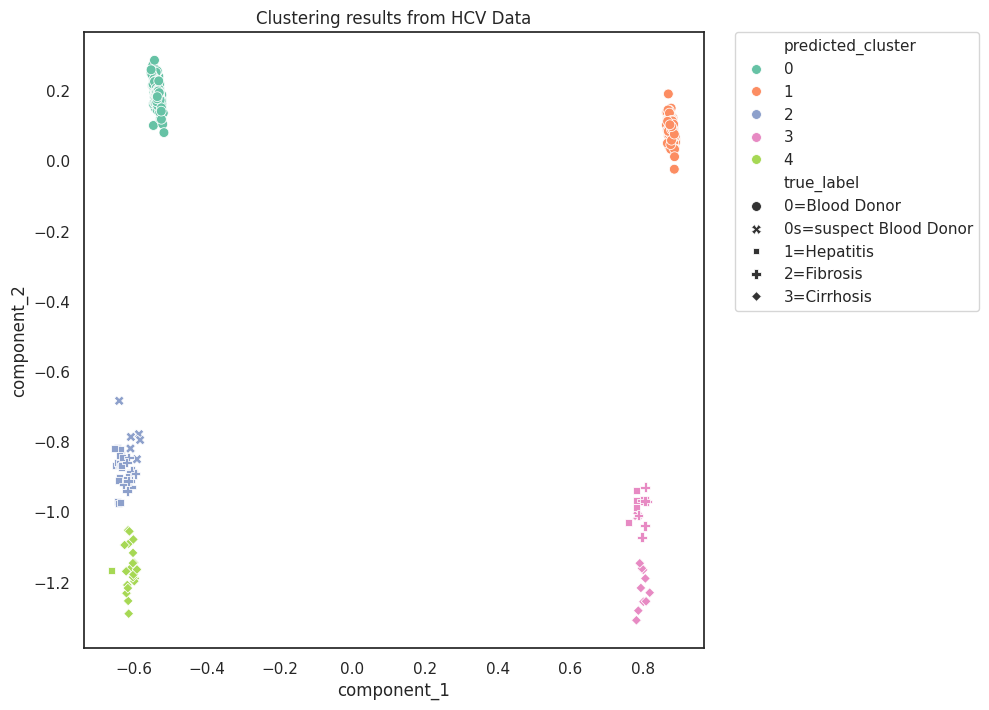

In [117]:
hcv.drop(columns='predicted_labels', inplace=True)  #drop the predicted labels before plotting

pcadf = pd.DataFrame(
     pipe["preprocessor"].transform(hcv),
    columns=["component_1", "component_2"],
 )

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
     x="component_1",
     y="component_2",
     s=50,
     data=pcadf,
     hue="predicted_cluster",
     style="true_label",
     palette="Set2",
 )

scat.set_title(
    "Clustering results from HCV Data"
 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

The visual representation of the clusters confirms the results of the two clustering evaluation metrics. The performance of your pipeline was pretty good. The clusters only slightly overlapped, and cluster assignments were much better than random.